In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyclustering.cluster.cure import cure

# pip install pyclustering

In [2]:
df = pd.read_excel('Data Test.xlsx')
df.head(10)

,STT,Tọa độ X,Tọa độ Y
0,1,1,12
1,2,24,23
2,3,4,9
3,4,8,1
4,5,20,1
5,6,1,8
6,7,11,2
7,8,3,9
8,9,20,19
9,10,24,4


In [3]:
data = df[['Tọa độ X', 'Tọa độ Y']].values
data

array([[ 1, 12],
       [24, 23],
       [ 4,  9],
       [ 8,  1],
       [20,  1],
       [ 1,  8],
       [11,  2],
       [ 3,  9],
       [20, 19],
       [24,  4],
       [25, 29],
       [22, 10],
       [16,  9],
       [28, 23],
       [21, 25],
       [ 6, 28],
       [ 6,  2],
       [13, 29],
       [13,  4]], dtype=int64)

In [4]:
# Khởi tạo thông số
number_clusters = 5  # Số cụm
number_represent_points = 5  # Số điểm đại diện cho mỗi cụm
compression = 1  # Tỉ lệ nén

# Chạy thuật toán CURE
cure_model = cure(data, number_clusters, number_represent_points=number_represent_points, compression=compression)
cure_model.process()
clusters = cure_model.get_clusters()

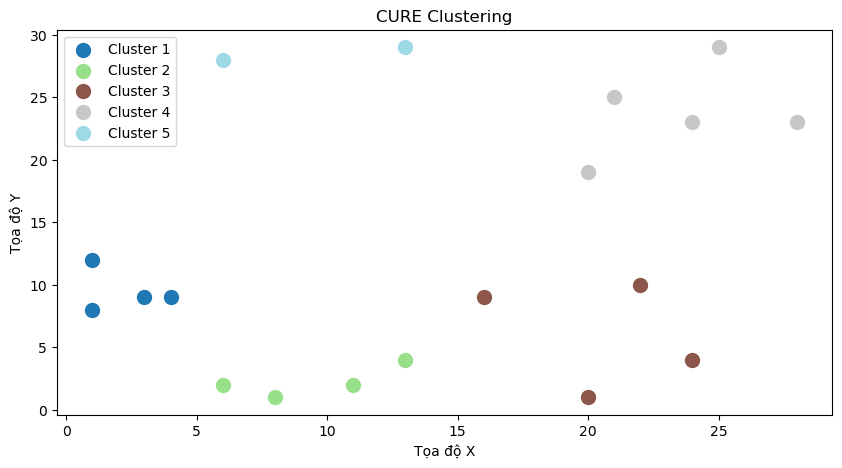

In [5]:
# Vẽ biểu đồ phân cụm
plt.figure(figsize=(10, 5))
colors = plt.cm.get_cmap('tab20', len(clusters))

for cluster_id, cluster in enumerate(clusters):
    cluster_points = data[cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                color=colors(cluster_id), s=100, label=f'Cluster {cluster_id + 1}')

plt.title('CURE Clustering')
plt.xlabel('Tọa độ X')
plt.ylabel('Tọa độ Y')
plt.legend()
plt.show()

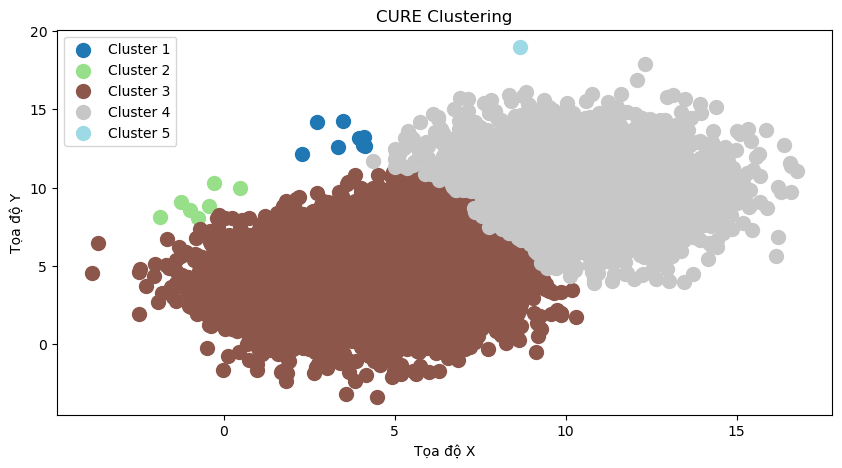

In [6]:
# Chạy với tập dữ liệu lớn:
np.random.seed(42)
cluster_1 = np.random.normal(loc=[4, 4], scale=2.0, size=(5000, 2))
cluster_2 = np.random.normal(loc=[10, 10], scale=2.0, size=(5000, 2))
data = np.vstack([cluster_1, cluster_2])

# Khởi tạo thông số
number_clusters = 5
number_represent_points = 5
compression = 1

# Chạy thuật toán CURE
cure_model = cure(data, number_clusters, number_represent_points=number_represent_points, compression=compression)
cure_model.process()
clusters = cure_model.get_clusters()

# Vẽ biểu đồ phân cụm
plt.figure(figsize=(10, 5))
colors = plt.cm.get_cmap('tab20', len(clusters))

for cluster_id, cluster in enumerate(clusters):
    cluster_points = data[cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                color=colors(cluster_id), s=100, label=f'Cluster {cluster_id + 1}')

plt.title('CURE Clustering')
plt.xlabel('Tọa độ X')
plt.ylabel('Tọa độ Y')
plt.legend()
plt.show()